# TD1 exo 1

On va représenter l'espace des fréquences continu avec une résolution très fine  0.01𝐻𝑧  comparé à la fréquence d'échantillonnage  𝐹𝑒=1  arbitraire. Les sommes peuvent être faites par une boucle |for| mais on peut utiliser le calcul matriciel et faire un véritable produit scalaire puisque c'en est un  𝑐(𝑓) .

Analysez et nommez les axes des figures (xlabel, ylabel) en donnant les unités.

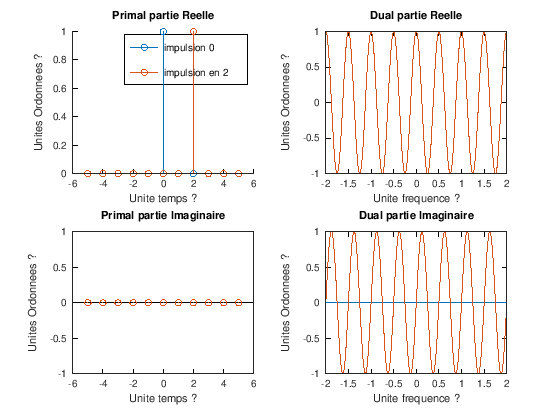

In [3]:
clear all; close all;
% k est le vecteur entier assoicié au temps
Fe=1; Te = 1/Fe; k=-5:5;

% f est le vecteur "presque" continu des fréquences
Df= Fe/1000; %résolution fine
f=-2*Fe: Df:2*Fe;

% x1 et xl les échantillons des signaux
% sur une fenêtre temporelle "presque" infinie
delta = @(k) k==0 ; % impulsion unité discrète (astuce vaut 1 quand vrai)
x1 = delta(k);
l=2;xl = delta(k-l); % retardé de l=2 échantillons

tfsd_x1 = tfsd(x1,k,f,Te); % voir tfsd.m ou help tfsd
tfsd_xl = tfsd(xl,k,f,Te);

plot_dual([k; k],"Unite temps ?",
        [x1;xl],"Unites Ordonnees ?",
        [f;f],"Unite frequence ?",
        [tfsd_x1; tfsd_xl],"Unites Ordonnees ?",
        ["impulsion 0";"impulsion en 2"],
        primalDiscret=true,
        dualDiscret=false);
